<a href="https://colab.research.google.com/github/gianluigilopardo/dataspaces/blob/master/absenteeism_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Absenteeism at work
Gianluigi Lopardo - Tesina Data Spaces a.a 2019/2020



### Table of contents
1. [Introduction](#first)
2. [Data preprocessing](#second)
3. [Exploratory Data Analysis](#third)
4. [Data preparation](#fourth)
  * 4.1 [Principal Component Analysis](#fourth_1)
  * 4.2 [Oversampling](#fourth_2)
5. [Classification Models](#fifth)
  * 5.1 [Full classification](#fifth_1)
  * 5.2 [Binary classification](#fifth_2)
  * 5.3 [Feature importance](#fifth_3)
6. [References](#sixth)
  

## 1. <a class="anchor" id="first">Introduction</a>

The dataset used is [Absenteeism at work](http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work) from UCI Machine learning repository. The aim of this work is to apply **classification** to **predict** absenteeism at work.

Absenteeism represents for the company the loss of productivity and quality of work. Predicting it can help companies organize tasks appropriately in order to optimize work and avoid stressful situations for both the company and its employees.

The Analysis is conducted in Python using Colab Notebook, which is a web application that allows you to create an interactive environment that contains live code, visualizations and text. 

The dataset contains 740 entries. Every entry has 21 attributes.
It was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

### Attribute Information:

* Individual identification (ID)
* Reason for absence

 Absences attested by the [International Code of Diseases (ICD)](https://www.who.int/classifications/icd/en/) stratified into 21 categories (1 to 21) as follows and 7 categories without ICD (22 to 28):
  1. Certain infectious and parasitic diseases
  2. Neoplasms
  3. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
  4. Endocrine, nutritional and metabolic diseases
  5. Mental and behavioural disorders
  6. Diseases of the nervous system
  7. Diseases of the eye and adnexa
  8. Diseases of the ear and mastoid process
  9. Diseases of the circulatory system
  10. Diseases of the respiratory system
  11. Diseases of the digestive system
  12. Diseases of the skin and subcutaneous tissue
  13. Diseases of the musculoskeletal system and connective tissue
  14. Diseases of the genitourinary system
  15. Pregnancy, childbirth and the puerperium
  16. Certain conditions originating in the perinatal period
  17. Congenital malformations, deformations and chromosomal abnormalities
  18. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
  19. Injury, poisoning and certain other consequences of external causes
  20. External causes of morbidity and mortality
  21. Factors influencing health status and contact with health services.
  22. patient follow-up 
  23. medical consultation
  24. blood donation 
  25. laboratory examination 
  26. unjustified absence 
  27. physiotherapy 
  28. dental consultation
* Month of absence
* Day of the week: Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)
* Seasons: summer (1), autumn (2), winter (3), spring (4)
* Transportation expense
* Distance from Residence to Work (kilometers)
* Service time (years)
* Age
* Work load Average/day
* Hit target
* Disciplinary failure: yes=1, no=0
* Education: high school (1), graduate (2), postgraduate (3), master and doctor (4))
* Son (number of children)
* Social drinker: yes=1, no=0
* Social smoker yes=1, no=0
* Pet (number of pet)
* Weight
* Height
* Body mass index
* Absenteeism time in hours (target)



## 2. <a class="anchor" id="second">Data preprocessing</a>
After importing data and the Python libraries that we will use, the first step is to preprocess the data: we have to convert the data from one format to another, we will check the missing or invalid values and convert everything in a standardized format on all the data, so that we can easily manage and analyze them.

In [0]:
# IMPORTING PACKAGES

# warnings
import warnings
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

# file and data
from google.colab import files
import calendar

# scientific
import pandas as pd 
import numpy as np 
from numpy import random

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# dimensionality and oversampling
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import RandomOverSampler

# models 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

SEED = 42
random.seed(SEED)

In [2]:
# IMPORTING DATA
url = "https://raw.githubusercontent.com/gianluigilopardo/dataspaces/master/Absenteeism_at_work.csv"
ds = pd.read_csv(url, sep=',')
print("The dataset has %d rows and %d columns." % ds.shape)

The dataset has 740 rows and 21 columns.


Now that we have the data, let's take a look at it to evaluate how to proceed.

In [3]:
ds.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,97,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,97,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,97,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8


Before entering the analysis, it is advisable to rename the columns of the dataset, in order to have more easily traceable variables.




In [4]:
# renaming labels
ds = ds.rename(columns = {'Reason for absence': 'reason', 
                          'Month of absence': 'month', 
                          'Day of the week': 'day', 
                          'Transportation expense': 'trans_exp', 
                          'Distance from Residence to Work': 'distance', 
                          'Service time': 'serv_time', 
                          'Work load Average/day ': 'work_load', 
                          'Hit target': 'hit_tg', 
                          'Disciplinary failure': 'disc_fail', 
                          'Social drinker': 'drinker', 
                          'Social smoker': 'smoker', 
                          'Body mass index': 'bmi', 
                          'Absenteeism time in hours': 'abs_hours'})
ds = ds.rename(columns = lambda x: x.lower()) # using lambda function to lowercase labels
ds.head(3)

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2


Now I check for null values in the dataset:

In [5]:
print("There are " + ("some" if ds.isnull().values.any() else "no")  + " null/missing values in the dataset.")

There are no null/missing values in the dataset.


There are no missing values in the dataset. Now we have to check the invalid data in the dataset. 




In [6]:
ds.describe() # summary of data

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Looking at the summary, we immediately see two anomalies: 
* *month* should be from 1 to 12, but it has at least a 0 value
* *reason* should be from 1 to 28, but it has at least a 0 value


In [7]:
ds[ds['month'] == 0]

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,95,0,1,1,0,0,1,77,175,25,0


These have to be considered invalid data. I ignore these records.

In [0]:
ds = ds[ds['month'] != 0]

Now let's check *Reason of absence*.

In [9]:
len(ds[ds['reason'] == 0]) # occurences with 'reason' = 0.

40

It is not a small number. It is necessary to go deeper before decide how to procede.

In [10]:
ds[ds['reason'] == 0].describe() # summary of the subset of data having reason = 0

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,40.000000,40.0,40.000000,40.00000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,18.225000,0.0,7.875000,3.82500,3.25000,251.900000,26.125000,12.550000,39.275000,276.229600,92.250000,1.0,1.125000,1.350000,0.675000,0.200000,0.850000,82.925000,171.850000,28.100000,0.0
std,11.561402,0.0,2.690796,1.25856,1.00639,78.647151,14.211204,3.565864,7.309942,40.101505,5.147815,0.0,0.404304,1.098951,0.474342,0.405096,1.494434,14.794988,5.413895,5.400855,0.0
min,1.000000,0.0,3.000000,2.00000,1.00000,118.000000,5.000000,4.000000,28.000000,237.656000,81.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,65.000000,163.000000,21.000000,0.0
25%,7.000000,0.0,5.000000,3.00000,3.00000,229.500000,14.500000,11.000000,33.000000,244.387000,88.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,68.750000,168.000000,24.000000,0.0
50%,18.500000,0.0,9.000000,4.00000,4.00000,247.000000,22.500000,12.500000,39.000000,265.017000,92.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,84.000000,170.000000,25.000000,0.0
75%,28.250000,0.0,10.000000,5.00000,4.00000,291.000000,35.250000,14.000000,44.000000,284.236500,97.000000,1.0,1.000000,2.000000,1.000000,0.000000,1.000000,98.000000,178.000000,31.000000,0.0
max,36.000000,0.0,11.000000,6.00000,4.00000,388.000000,51.000000,18.000000,50.000000,378.884000,99.000000,1.0,3.000000,4.000000,1.000000,1.000000,5.000000,106.000000,185.000000,38.000000,0.0


I see that all the records having *reason = 0* also have *abs_hours = 0*. 
These records probably refers to cases of late work for less than an hour and so justification is not available. Considering these records into the analysis could be interesting and also useful for a company, so I keep them.

In [11]:
ds.describe()

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.00000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,18.027137,19.294437,6.350068,3.913161,2.546811,221.514247,29.624152,12.549525,36.419267,271.491339,94.586160,0.054274,1.29308,1.017639,0.567164,0.073270,0.734057,78.983718,172.116689,26.658073,6.952510
std,11.007622,8.360679,3.419430,1.422090,1.112329,66.960952,14.843701,4.393121,6.461156,39.137634,3.786916,0.226712,0.67435,1.100130,0.495805,0.260756,1.292682,12.866993,6.045341,4.274201,13.350793
min,1.000000,0.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.00000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.00000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


There is one more attribute to check: *disc_fail*. It is a boolean value.

In [12]:
len(ds[ds['disc_fail'] == 1]) # Check how many records have 1 

40

In [13]:
ds[ds['disc_fail'] == 1].describe()

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours
count,40.000000,40.0,40.000000,40.00000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0
mean,18.225000,0.0,7.875000,3.82500,3.25000,251.900000,26.125000,12.550000,39.275000,276.229600,92.250000,1.0,1.125000,1.350000,0.675000,0.200000,0.850000,82.925000,171.850000,28.100000,0.0
std,11.561402,0.0,2.690796,1.25856,1.00639,78.647151,14.211204,3.565864,7.309942,40.101505,5.147815,0.0,0.404304,1.098951,0.474342,0.405096,1.494434,14.794988,5.413895,5.400855,0.0
min,1.000000,0.0,3.000000,2.00000,1.00000,118.000000,5.000000,4.000000,28.000000,237.656000,81.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,65.000000,163.000000,21.000000,0.0
25%,7.000000,0.0,5.000000,3.00000,3.00000,229.500000,14.500000,11.000000,33.000000,244.387000,88.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,68.750000,168.000000,24.000000,0.0
50%,18.500000,0.0,9.000000,4.00000,4.00000,247.000000,22.500000,12.500000,39.000000,265.017000,92.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,84.000000,170.000000,25.000000,0.0
75%,28.250000,0.0,10.000000,5.00000,4.00000,291.000000,35.250000,14.000000,44.000000,284.236500,97.000000,1.0,1.000000,2.000000,1.000000,0.000000,1.000000,98.000000,178.000000,31.000000,0.0
max,36.000000,0.0,11.000000,6.00000,4.00000,388.000000,51.000000,18.000000,50.000000,378.884000,99.000000,1.0,3.000000,4.000000,1.000000,1.000000,5.000000,106.000000,185.000000,38.000000,0.0


40 records have *disc_fail=1*, everyone else has 0.
We notice that all the records having *Disciplinary failure* correspond to the ones with *abs_hours* = 0. This relationship will certainly be useful in our classification models.

It could be interesesting to know the distribution of these *disciplinary failure* over the employees and understand if those who received it tending to do less delays or absences. Anyway, we don't have this information.

I checked for the zeros and the invalid values among the dataset. 
Now I prepare data for visualization and analysis.

We see that there are several categorical attributes represented using integer values. In order to manage them, it is opportune to set their type as [Categorical data](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html). 

In [14]:
# Here I will add extended values for categorical data.

# Adding Season names:
season_mapping = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
ds['season_name'] = ds.seasons.map(season_mapping)
ds['season_name'] = ds['season_name'].astype('category')

# Adding Month names abbrevations:
ds['month_name'] =  ds['month'].apply(lambda x: calendar.month_abbr[x])
ds['month_name'] = ds['month_name'].astype('category')

# Adding day names abbrevations:
ds['day_name'] =  ds['day'].apply(lambda x: calendar.day_abbr[x-2])
# calendar 0: Monday, but I want 2: Monday
ds['day_name'] = ds['day_name'].astype('category')

# Adding reasons value:
reason_mapping = {
    0: 'Not available',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
ds['reason_text'] = ds['reason'].map(reason_mapping)
ds['reason_text'] = ds['reason_text'].astype('category')

# Adding Education:
education_mapping = {
    1: '1. High School',
    2: '2. Graduate',
    3: '3. Post Graduate',
    4: '4. Master & Doctor'
}
ds['education_detail'] = ds['education'].map(education_mapping)
ds['education_detail'] = ds['education_detail'].astype('category')

# smoker and drinker are boolean
ds['smoker'] = ds['smoker'].astype('bool')
ds['drinker'] = ds['drinker'].astype('bool')
ds['disc_fail'] = ds['disc_fail'].astype('bool')

# Now ds contains categorical data twice.
# I drop the old columns, but before I keep save of everything
# in ds_explore: it will be used for data exploration and we will 
# choose the better format each way.

ds_explore = ds.copy()
ds = ds.drop(columns = {'id','reason','month','day','seasons','education'})

# I check the firsts rows:
ds_explore.head()

,id,reason,month,day,seasons,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,education,son,drinker,smoker,pet,weight,height,bmi,abs_hours,season_name,month_name,day_name,reason_text,education_detail
0,11,26,7,3,1,289,36,13,33,239.554,97,False,1,2,True,False,1,90,172,30,4,Summer,Jul,Tue,Unjustified absence,1. High School
1,36,0,7,3,1,118,13,18,50,239.554,97,True,1,1,True,False,0,98,178,31,0,Summer,Jul,Tue,Not available,1. High School
2,3,23,7,4,1,179,51,18,38,239.554,97,False,1,0,True,False,0,89,170,31,2,Summer,Jul,Wed,Medical consultation,1. High School
3,7,7,7,5,1,279,5,14,39,239.554,97,False,1,2,True,True,0,68,168,24,4,Summer,Jul,Thu,Diseases of the eye and adnexa,1. High School
4,11,23,7,5,1,289,36,13,33,239.554,97,False,1,2,True,False,1,90,172,30,2,Summer,Jul,Thu,Medical consultation,1. High School


## 3.  <a class="anchor" id="third">Exploratory Data Analysis</a>



Sometimes simple plotting can help understanding how to proceed. We analyze the distribution of *Absenteeism time in hours* and then we try to undestrand the relationships between the other features. 

Text(0, 0.5, 'Frequency')

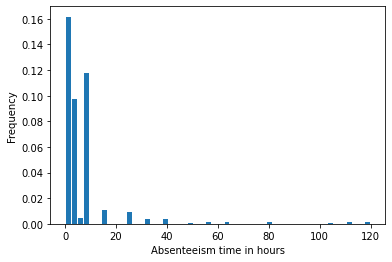

In [15]:
# Plotting absenteeism hours 
bins = 50
fig, ax = plt.subplots()
ax.hist(ds_explore['abs_hours'], bins, rwidth=0.8, density = True)
ax.set_xlabel('Absenteeism time in hours')
ax.set_ylabel('Frequency')

Absenteeism time is highly skewed due to presence of outliers. 

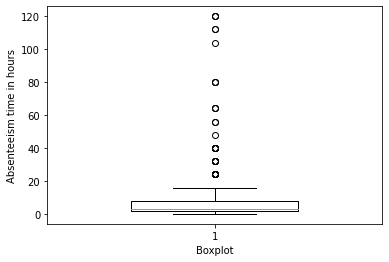

In [16]:
# boxplot of Absenteeism time. 
plt.boxplot(ds_explore['abs_hours'], widths = 0.5)
plt.ylabel('Absenteeism time in hours')
plt.xlabel('Boxplot')
plt.show()

Clearly, in *Abseteeism time in hours* there is a great presence of outliers. It seems there are few observations particularly unusual.

Text(0, 0.5, 'Frequency')

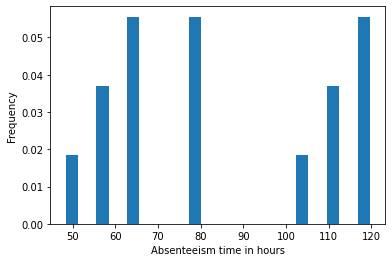

In [17]:
# boxplot of Absenteeism time for values grater than a week (40 hours). 
bins = 20
fig, ax = plt.subplots()
out = ds_explore[ds_explore['abs_hours'] > 40]
ax.hist(out['abs_hours'], bins, rwidth = 0.8, density = True)
ax.set_xlabel('Absenteeism time in hours')
ax.set_ylabel('Frequency')

The dataset is clearly unbalanced: the number of records of the classes can be too different. I will solve this issue with **oversampling** later.



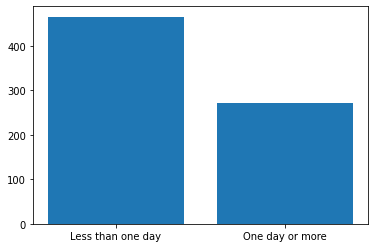

In [18]:
# Plotting absence 
time = ds_explore['abs_hours']
hours = np.count_nonzero(time < 8)
days = np.count_nonzero(time >= 8)
x = np.array(['Less than one day', 'One day or more'])
y = np.array([hours, days])
plt.bar(x, y)
plt.show()

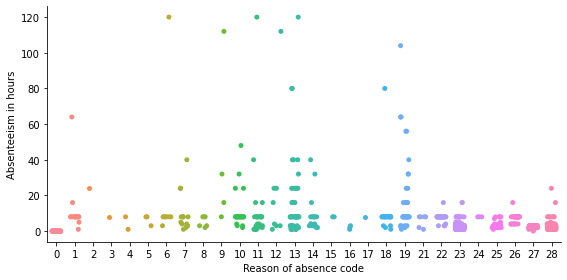

In [19]:
# Plot of Absenteeism time in hours with Reason for absence. 
# To verify the outliers in each reason codes. 
sns.catplot(x = 'reason', y = 'abs_hours', 
            data = ds_explore,
            height = 4,
            aspect = 2,
            jitter = '0.25',
            ).set_axis_labels("Reason of absence code", 'Absenteeism in hours')

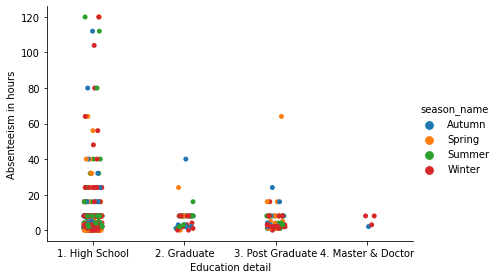

In [20]:
# EDUCATION AND SEASON
sns.catplot(x = 'education_detail', y = 'abs_hours', 
            hue = 'season_name',
            data = ds_explore,
            height = 4,
            aspect = 1.5).set_axis_labels("Education detail", 'Absenteeism in hours')

In [21]:
# Employees per education
ds_explore.groupby('education_detail')['id'].nunique()

education_detail
1. High School        27
2. Graduate            4
3. Post Graduate       3
4. Master & Doctor     1
Name: id, dtype: int64

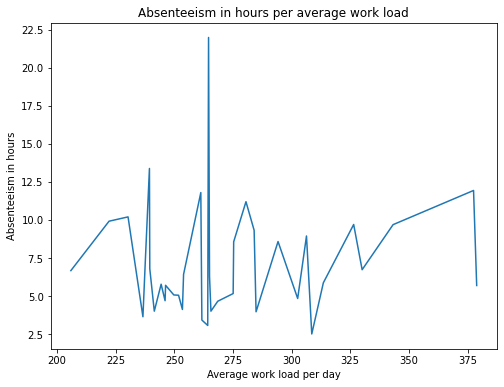

In [22]:
# Wok load
work_hours = ds.groupby('work_load', as_index=False)[['abs_hours']].mean()
ax = work_hours.plot(kind = 'line', x = 'work_load', figsize = (8,6), legend=False)
ax.set_ylabel('Absenteeism in hours')
ax.set_xlabel('Average work load per day')
ax.set_title('Absenteeism in hours per average work load')
plt.show()

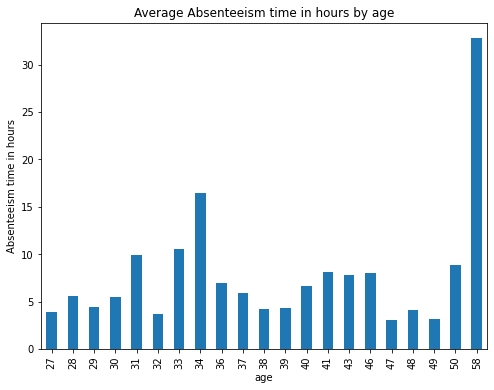

In [23]:
# Age
age_abs = ds.groupby('age')[['abs_hours']].mean()
ax = age_abs.plot(kind='bar', figsize=(8,6), legend=False)
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by age')
plt.show()

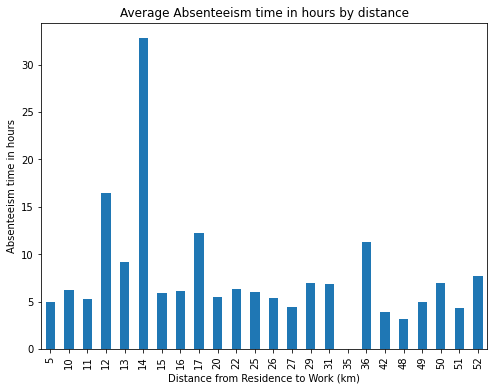

In [24]:
# Distance from work
dis_abs = ds.groupby('distance')[['abs_hours']].mean()
ax = dis_abs.plot(kind='bar', figsize=(8,6), legend=False)
ax.set_xlabel('Distance from Residence to Work (km)')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by distance')
plt.show()

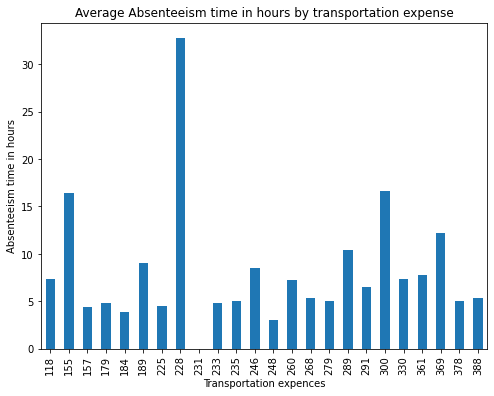

In [25]:
# Transportation expense
dis_abs = ds.groupby('trans_exp')[['abs_hours']].mean()
ax = dis_abs.plot(kind='bar', figsize=(8,6), legend=False)
ax.set_xlabel('Transportation expences')
ax.set_ylabel('Absenteeism time in hours')
ax.set_title('Average Absenteeism time in hours by transportation expense')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

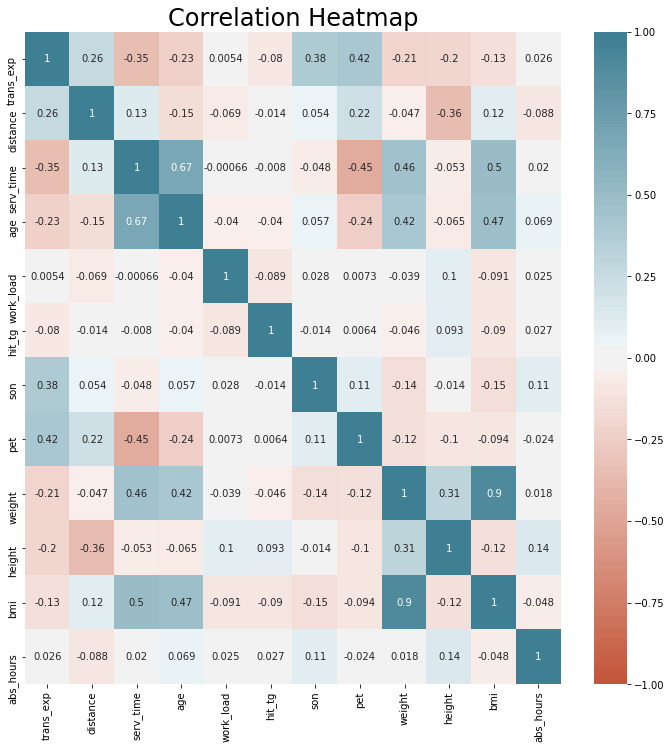

In [26]:
# Correlation matrix 
# I drop categorical attributes and I normalize
ds_num = ds.drop(columns = ['disc_fail', 'drinker', 'smoker', 'season_name', 
                            'month_name', 'day_name', 'reason_text', 'education_detail'])
ds_norm = (ds_num-ds_num.mean())/ds_num.std()
corr = ds_norm.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True, 
            vmin = -1, vmax = 1, center = 0,
            cmap = sns.diverging_palette(20, 220, n = 200))
plt.title('Correlation Heatmap', fontsize = 24)


Some features are being highlighted in the heatmap. Let's have a look to the more intresting. However, strong correlation among *bmi*, *height* and *weight* and between *distance* and *transport expences* may suggest to remove some feature.

1. Strong positive correlation between *Age* and *Service time*.
2. Positive correlation between *Service time* and *bmi* (and so *Weight*).
3. Negative correlation between *Transport expences* and *Service time*.
4. Negative correlation between *Service time* and number of *Pet*.

We notice that no feature have strong negative or positive correlation with *Absenteeism time in hours*. We have to go deeper. What is more, clearly in the heatap they are not considered the categorical data.




We would like to reduce dimensionality in order to make our algorithm more agile but this has to be made by paying attention to not losing information.

We have seen that *bmi* and *weight* have a very strong correlation: 0.9. This was expected, considering how it is calculated:
$$ bmi = \frac{weigth}{height^2} $$

We can say that we don't lose information by removing one of the two.
Since also height is in my dataset, I decide to drop *weight*.



In [0]:
ds = ds.drop(columns = 'weight')

## 4. <a class="anchor" id="fourth">Data preparation</a>

In order to make **prediction**, I would like to be as specific as possible and therefore to make a **classification** that is well suited to the application case. I want to divide the values of *Absenteeism in hours*, considering the effective time of absence. Considering a work day of 8 hours and I split the set in three labels:
* *late*: if the absence lasts strictly less than 2 hours
* *hours*: if the absence was for about less than a work day
* *days*: if the absence was for one day or more


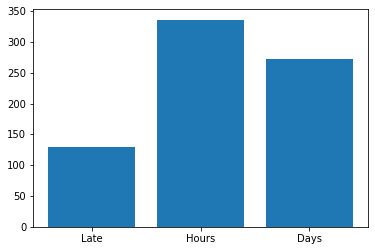

In [28]:
# Plotting absence last
time = ds['abs_hours']
late = np.count_nonzero(time < 2)
days = np.count_nonzero(time >= 7)
hours = np.count_nonzero(time >= 2) - days
x = np.array(['Late', 'Hours', 'Days'])
y = np.array([late, hours, days])
plt.bar(x, y)
plt.show()

On the other hand, watching at the distribution of the dataset, so we can expect that applying such a division the models will not perform at their best.

We can have models with better performance (and therefore more safety) using only two classes. We apply **binary classification** by dividing the set according to the median of our target variable.

In [29]:
# Create label for ABS_HOURS: assume 8 hours day work

def level(absh):
  if(absh < 2):
    lev = 'late'
  elif((absh >= 2) and (absh < 7)):
    lev = 'hours'
  elif(absh >= 7):
    lev = 'days'    
  return lev

def level_day(absh):
  if(absh < 3):
    day = 'less'
  elif(absh >= 3):
    day = 'more'    
  return day

ds['abs_lev'] = ds['abs_hours'].apply(lambda x: level(x)).astype('category')
ds['abs_day'] = ds['abs_hours'].apply(lambda x: level_day(x)).astype('category')

ds.head()

,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,son,drinker,smoker,pet,height,bmi,abs_hours,season_name,month_name,day_name,reason_text,education_detail,abs_lev,abs_day
0,289,36,13,33,239.554,97,False,2,True,False,1,172,30,4,Summer,Jul,Tue,Unjustified absence,1. High School,hours,more
1,118,13,18,50,239.554,97,True,1,True,False,0,178,31,0,Summer,Jul,Tue,Not available,1. High School,late,less
2,179,51,18,38,239.554,97,False,0,True,False,0,170,31,2,Summer,Jul,Wed,Medical consultation,1. High School,hours,less
3,279,5,14,39,239.554,97,False,2,True,True,0,168,24,4,Summer,Jul,Thu,Diseases of the eye and adnexa,1. High School,hours,more
4,289,36,13,33,239.554,97,False,2,True,False,1,172,30,2,Summer,Jul,Thu,Medical consultation,1. High School,hours,less


In [0]:
X = ds.drop(columns = ['abs_lev', 'abs_day', 'abs_hours'])
y = ds['abs_lev']
y_day = ds['abs_day']
y_int = ds['abs_hours']

Now I split the sets in two subsets:
* **Training set**: collection of labeled data objects used to learn
the classification model
* **Test set**: Collection of labeled data objects used to
validate the classification model

I use 70% of data as training set and 30% for tests.

In [0]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column. 
X['season_name'] = label_encoder.fit_transform(X['season_name']) 
X['month_name'] = label_encoder.fit_transform(X['month_name']) 
X['day_name'] = label_encoder.fit_transform(X['day_name']) 
X['reason_text'] = label_encoder.fit_transform(X['reason_text']) 
X['education_detail'] = label_encoder.fit_transform(X['education_detail'])
X['smoker'] = label_encoder.fit_transform(X['smoker'])
X['drinker'] = label_encoder.fit_transform(X['drinker'])
X['disc_fail'] = label_encoder.fit_transform(X['disc_fail'])
ylabel = label_encoder.fit_transform(y)
levels = label_encoder.inverse_transform(list(set(ylabel)))
ybin = label_encoder.fit_transform(y_day)
bin_levels = label_encoder.inverse_transform(list(set(ybin)))

X_train, X_test, y_train, y_test = train_test_split(X, ylabel, test_size = 0.3, random_state = SEED, stratify = ylabel)
Xbin_train, Xbin_test, ybin_train, ybin_test = train_test_split(X, ybin, test_size = 0.3, random_state = SEED, stratify = ybin)

### 4.1 <a class="anchor" id="fourth_1">Principal Component Analysis</a>
[Principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is a statistical procedure that uses an orthogonal transformation to reduce data dimensionality.
This occurs through a linear transformation of the variables that projects the original ones into a new Cartesian system in which the new variable with the greatest variance is projected on the first axis, the new variable, the second for the size of the variance, on the second axis and so on.

The dataset has 10 numerical features and 8 categorical feature. Among the categorical feature, 4 of them are binary and 5 are nominal.

There is something to do in order to work with the nominal values. The original dataset applies **label encoding**: nominal values are encoded as integer positive values. 

The problem is that numerical values implies an order, but clearly we can't say that *Summer* is bigger than *Winter* or that *Diseases of the nervous system* is smaller than *Diseases of the respiratory system*. This tecnique can be useful in when applied to values that can be ordedered or have some sort of heriarchy, for example *Education* can be seen as the *Level of education* and so an order could make sense. Anyway, this is not the case for most of the nominal features here.

To overcame this problem, the most commonly technique used is **one hot encoding**. Each category value is converted into a new column: we assign 1 to the corresponding value and 0 to everything else. 

Appling it here, this implies adding about 50 new columns: one for each levels of each categorical attribute. In general, this can't be ignored and made straigthforward. 

However, I will using **Principal Component Analysis** in order to reduce dimensions, so for now I keep all the columns.


In [32]:
X_pca = X.copy()

# Adding the new columns
X_pca = pd.concat([X_pca,pd.get_dummies(X_pca['reason_text'], prefix = 'reason')], axis=1)
X_pca = pd.concat([X_pca,pd.get_dummies(X_pca['month_name'], prefix = 'month')], axis=1)
X_pca = pd.concat([X_pca,pd.get_dummies(X_pca['day_name'], prefix = 'day')], axis=1)
X_pca = pd.concat([X_pca,pd.get_dummies(X_pca['season_name'], prefix = 'season')], axis=1)
X_pca = pd.concat([X_pca,pd.get_dummies(X_pca['education_detail'], prefix = 'education')], axis=1)

# Removing the old nominal variables
X_pca.drop(['reason_text'],axis=1, inplace=True)
X_pca.drop(['month_name'],axis=1, inplace=True)
X_pca.drop(['day_name'],axis=1, inplace=True)
X_pca.drop(['season_name'],axis=1, inplace=True)
X_pca.drop(['education_detail'],axis=1, inplace=True)

X_pca.head(3)

,trans_exp,distance,serv_time,age,work_load,hit_tg,disc_fail,son,drinker,smoker,pet,height,bmi,reason_0,reason_1,reason_2,reason_3,reason_4,reason_5,reason_6,reason_7,reason_8,reason_9,reason_10,reason_11,reason_12,reason_13,reason_14,reason_15,reason_16,reason_17,reason_18,reason_19,reason_20,reason_21,reason_22,reason_23,reason_24,reason_25,reason_26,reason_27,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,day_0,day_1,day_2,day_3,day_4,season_0,season_1,season_2,season_3,education_0,education_1,education_2,education_3
0,289,36,13,33,239.554,97,0,2,1,0,1,172,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
1,118,13,18,50,239.554,97,1,1,1,0,0,178,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,179,51,18,38,239.554,97,0,0,1,0,0,170,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0


In [33]:
# Normalize:
X_pca_norm = (X_pca-X_pca.mean())/X_pca.std()

X_pca_norm.head()
print("There are " + ("some" if X_pca_norm.isnull().values.any() else "no")  + " null/missing values in the dataset.")

There are no null/missing values in the dataset.


Text(0, 0.5, 'Variance explained')

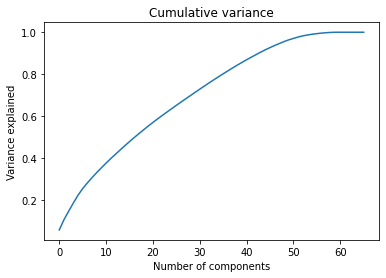

In [34]:
# calculate the principal components
X_pca = PCA().fit(X_pca_norm)
cumvar = np.cumsum(X_pca.explained_variance_ratio_)
#Plotting cumulative variance
plt.plot(cumvar)
plt.title('Cumulative variance')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')

In [35]:
cumvar[20]

0.5691614364613821

The cumulative variance plot show us that only about the 55% of variance is explained by the first 20 principal components and so we cannot eliminate the other without losing a lot of information.

However, by using all the PCs needed to cover at least the 80% of the variance we do not take advantage from PCA. So I will not use it.

In [36]:
n_used = 20
X_pca = np.dot(X_pca_norm.values, X_pca.components_[:n_used,:].T)
X_pca = pd.DataFrame(X_pca, columns=["PC%d" % (x + 1) for x in range(n_used)])
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,1.696883,0.519021,-1.497244,2.754662,-0.402659,0.384622,0.267445,0.626527,-1.029813,-2.744821,-0.033449,-1.216773,-0.694789,1.282899,-0.408166,-2.028526,-0.655109,0.672667,-0.434694,-1.147092
1,2.852038,-0.317962,2.102818,0.650229,-2.794399,4.657505,-1.260736,-0.434032,-0.621806,-2.838638,0.774322,-1.193394,-1.736535,-0.555463,-1.067320,-1.070017,-0.924332,-0.554630,-0.337473,-0.940190
2,1.711816,-1.000532,-1.143651,1.948954,-1.414614,-0.305063,-0.590595,-0.573399,-1.866106,-0.999258,0.083182,1.681820,-0.953736,1.496437,-0.310185,-0.658799,-0.501712,-0.502951,-0.024113,-0.013751
3,0.337619,1.064853,-0.340386,2.606716,-0.897924,1.448334,1.219798,-0.175980,-1.044465,0.125072,-0.541235,-0.546080,0.469204,1.572426,1.135543,0.442372,-1.460847,-2.131501,-1.225806,0.188829
4,1.390976,0.633267,-1.630444,2.370097,-0.411186,0.026642,-0.055186,-0.473239,-0.989114,-0.213016,1.101580,-0.091829,-1.760028,0.861357,0.890621,-0.155819,-1.136403,-1.409940,-0.273333,-0.441165


### 4.2 <a class="anchor" id="fourth_2">Oversampling</a>
As discussed before, in the classification setting the dataset is heavily skewed towards low level of absenteeism and our classes are strongly unbalanced. We can solve this by oversamplig. 

There are three common techniques to do this:

1. The simplest is **Random oversampling**: it simply generates randomly new samples in the classes which are under-represented. 

2. **SMOTE** (Synthetic Minority Oversampling Technique): take a sample from the dataset, and consider its $k$ nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those $k$ neighbors, and the current data point. Multiply this vector by a random number $x$ which lies between $0$, and $1$. Add this to the current data point to create the new, synthetic data point.

3. **ADASYN** (ADAptive SYNthetic sampling approach) algorithm, builds on the methodology of SMOTE, by shifting the importance of the classification boundary to those minority classes which are difficult. ADASYN uses a weighted distribution for different minority class examples according to their level of difficulty in learning, where more synthetic data is generated for minority class examples that are harder to learn.

In [0]:
# GENERATING NEW DATASET WITH RANDOM OVERSAMPLING, SMOTE and ADASYN OVERSAMPLING

X_train_ROS, y_train_ROS = RandomOverSampler(random_state = SEED).fit_resample(X_train, y_train)
X_train_SMOTE, y_train_SMOTE = SMOTE(random_state = SEED).fit_resample(X_train, y_train)
X_train_ADASYN, y_train_ADASYN = ADASYN(random_state = SEED, sampling_strategy = 'minority').fit_resample(X_train, y_train)

In [38]:
y_set = {'simple': y_train, 'ROS': y_train_ROS, 'SMOTE': y_train_SMOTE, 'ADASYN': y_train_ADASYN}
for ys in y_set.keys():
  print('The', ys, 'train set has:')
  for i in set(ylabel):    
          print('\t', np.count_nonzero(y_set[ys] == i), 'records with label',levels[i])

The simple train set has:
	 190 records with label days
	 235 records with label hours
	 90 records with label late
The ROS train set has:
	 235 records with label days
	 235 records with label hours
	 235 records with label late
The SMOTE train set has:
	 235 records with label days
	 235 records with label hours
	 235 records with label late
The ADASYN train set has:
	 190 records with label days
	 235 records with label hours
	 243 records with label late


## 5. <a class="anchor" id="fifth">Classification Models</a>
Classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.




Here I apply the most commons classification algorithms and I will compare their performance using diffent metrics:

Let: $TP$ = True positives, $TN$ = True negative, $FP$ = False positive, $FN$ = False negative.

1. **Accuracy** = $\frac{TP + TN}{TP+TN + FP + FN} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$

2. **Precision** = $\frac{\text{TP}}{\text{TP + FP}}$

3. **Sensitivity** = $\frac{\text{TP}}{\text{TP + FN}}$

4. **Specificity** = $\frac{\text{TN}}{\text{TN + FP}}$

5. **F1 Score** = $2 \cdot \frac{\text{Precision}\cdot \text{Sensitivity}}{\text{Precision + Sensitivity}} $

All of these can be easily generalized to configurations with more than two classes by using weighted versions.

Great part of the work was to identify limits and peculiarities of different metrics. I also use **confusion matrix** as a measure of performance.

### 5.1 <a class="anchor" id="fifth_1">Full classification</a>

Here I try to predicts absenteeism levels using three classes: *late*, *hours*, *days*. Remember that these classes are strongly unbalanced as they have been simply chosen by considering the application.

I have to choose which of my datasets to use for classification. I decide to evaluate all of them using the random forest classifier and then I select the one which performs better.



In [39]:
# Random forest Classifier

#Simple dataset
simple_forest = RandomForestClassifier(random_state = SEED, n_estimators = 100, max_depth = 6).fit(X_train, y_train)
simple_pred = simple_forest.predict(X_test)

#Random oversampler
ros_forest = RandomForestClassifier(random_state = SEED, n_estimators = 100, max_depth = 6).fit(X_train_ROS, y_train_ROS)
random_over_pred = ros_forest.predict(X_test)

#SMOTE
SMOTE_forest = RandomForestClassifier(random_state = SEED, n_estimators = 100, max_depth = 6).fit(X_train_SMOTE, y_train_SMOTE)
SMOTE_pred = SMOTE_forest.predict(X_test)

#ADASYN 
ADASYN_forest = RandomForestClassifier(random_state = SEED, n_estimators = 100, max_depth = 6).fit(X_train_ADASYN, y_train_ADASYN)
ADASYN_pred = ADASYN_forest.predict(X_test)

#Performance 

#Simple data_set metrics: 
simple_pred_accuracy = accuracy_score(y_test, simple_pred)
simple_pred_precision = precision_score(y_test, simple_pred, average = 'weighted')
simple_pred_sensitivity = recall_score(y_test, simple_pred, average = 'weighted')
simple_pred_f1 = f1_score(y_test, simple_pred, average = 'weighted')

#Random oversampling metrics:
rnd_sampler_accuracy = accuracy_score(y_test, random_over_pred)
rnd_sampler_precision = precision_score(y_test,random_over_pred, average = 'weighted')
rnd_sampler_sensitivity = recall_score(y_test,random_over_pred, average = 'weighted')
rnd_sampler_f1 = f1_score(y_test,random_over_pred, average = 'weighted')

#SMOTE metrics: 
SMOTE_accuracy = accuracy_score(y_test, SMOTE_pred)
SMOTE_precision = precision_score(y_test, SMOTE_pred, average = 'weighted')
SMOTE_sensitivity = recall_score(y_test, SMOTE_pred, average = 'weighted')
SMOTE_f1 = f1_score(y_test, SMOTE_pred, average = 'weighted')

#ADASYN metrics:
ADASYN_accuracy = accuracy_score(y_test, ADASYN_pred)
ADASYN_precision = precision_score(y_test, ADASYN_pred, average = 'weighted')
ADASYN_sensitivity = recall_score(y_test, ADASYN_pred, average = 'weighted')
ADASYN_f1 = f1_score(y_test, ADASYN_pred, average = 'weighted')

# metrics
metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])
metrics.loc["Simple Dataset"] = [simple_pred_accuracy,simple_pred_precision,simple_pred_sensitivity,simple_pred_f1]
metrics.loc["Rnd oversampling"] = [rnd_sampler_accuracy,rnd_sampler_precision,rnd_sampler_sensitivity,rnd_sampler_f1]
metrics.loc["SMOTE"] = [SMOTE_accuracy,SMOTE_precision,SMOTE_sensitivity,SMOTE_f1]
metrics.loc["ADASYN"] = [ADASYN_accuracy,ADASYN_precision,ADASYN_sensitivity,ADASYN_f1]
metrics

,Accuracy,Precision,Sensitivity,F1 Score
Simple Dataset,0.707207,0.739710,0.707207,0.701455
Rnd oversampling,0.662162,0.664767,0.662162,0.661604
SMOTE,0.662162,0.660265,0.662162,0.660298
ADASYN,0.675676,0.678242,0.675676,0.675363


Text(0.5, 1.0, 'ADASYN dataset')

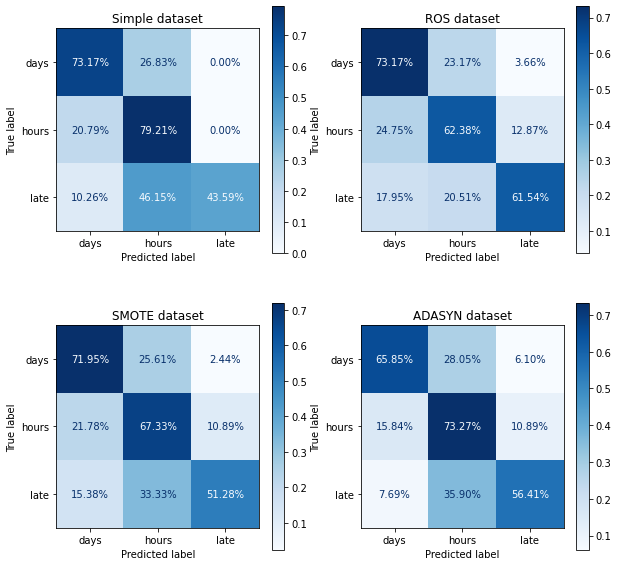

In [40]:
fig, ((simple, ros), (smote, adasyn)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

plot_confusion_matrix(simple_forest, X_test, y_test, display_labels = levels,
                      cmap = plt.cm.Blues, values_format = '0.2%', normalize = 'true', 
                      ax = simple)
plot_confusion_matrix(ros_forest, X_test, y_test, display_labels = levels,
                      cmap = plt.cm.Blues, values_format = '0.2%', normalize = 'true',
                      ax = ros)
plot_confusion_matrix(SMOTE_forest, X_test, y_test, display_labels = levels,
                      cmap = plt.cm.Blues, values_format = '0.2%', normalize = 'true',
                      ax = smote)
plot_confusion_matrix(ADASYN_forest, X_test, y_test, display_labels = levels,
                      cmap = plt.cm.Blues, values_format = '0.2%', normalize = 'true',
                      ax = adasyn)
simple.set_title('Simple dataset')
ros.set_title('ROS dataset')
smote.set_title('SMOTE dataset')
adasyn.set_title('ADASYN dataset')

Complexively, the best seems to be the SMOTE set: I will use it.

In [0]:
X_val = X_train
y_val = y_train
X_train = X_train_SMOTE
y_train = y_train_SMOTE

In [0]:
classification_metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])

#### <a class="anchor" id="fifth_1">Logitistic regression</a>
Logistic regression is a statistical model used to model the probability of a certain class or event existing.

If classes are binary, then we can compute the probability that a certain sample belongs to the cateogy $Y = 1$: 

$p(x) = \mathbb{P}(Y=1\vert X)$
It has distribution: $$p(x) = \frac{e^{\beta_0 + \beta_1x}}{1+e^{\beta_0 + \beta_1x}}$$

It can been generalized for $p$ variables: $$p(x) = \frac{e^{\beta_0 + \beta_1x + \dots + \beta_px_p}}{1+e^{\beta_0 + \beta_1x + \dots + \beta_px_p}}$$

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


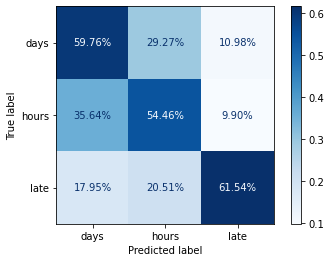

In [43]:
logistic = LogisticRegression(max_iter = 10000, random_state = SEED, solver = 'lbfgs').fit(X_train, y_train)
logistic_predict = logistic.predict(X_test)

#metrics:
logi_acc = accuracy_score(logistic_predict, y_test)
logi_preci = precision_score(logistic_predict, y_test, average = 'weighted')
logi_sensitivity = recall_score(logistic_predict, y_test, average = 'weighted')
logi_f1 = f1_score(logistic_predict, y_test, average = 'weighted')

classification_metrics.loc["Logistic regression"] = [logi_acc,logi_preci,logi_sensitivity,logi_f1]
plot_confusion_matrix(logistic, X_test, y_test, display_labels = levels,
                      cmap = plt.cm.Blues, values_format = '0.2%', normalize = 'true')

#### <a class="anchor" id="fifth_2">Decision Tree</a> 
A decision tree is a very common model for classification problems (it is also called a classification tree). In this context a decision tree describes a tree structure where the leaf nodes represent the classifications and the ramifications the set of properties that lead to those classifications. Consequently, each internal node is a macro-class consisting of the union of the classes associated with its child nodes.

In many situations it is useful to define a halting criterion, or even pruning criterion in order to determine its maximum depth. This is because the growing depth of a tree (or its size) does not directly affect the goodness of the model. Indeed, an excessive growth in the size of the tree could only lead to a disproportionate increase in computational complexity compared to the benefits regarding the accuracy of the predictions/classifications.

The algorithm chooses a variable at each step that best splits the set of items, according to certain metrics.

The parameters that are mostly used to guide the construction of the tree are the Gini index and the Entropy deviance.

The Gini Index is computed as:$$ GI(t) = 1-\sum_{j=1}^k p(j|t)^2$$
The Entropy deviance is computed as:$$ Entropy(t) = -\sum_{j=1}^k p(j|t)log_2(p(j|t))$$
$\forall \text{ node } t$, where $p(j|t)$ is the relative frequency of class $j$ at node $t$.


In [44]:
# Evaluating best parameters
depth = np.arange(4, 20) 
parameters = {'max_depth': depth}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion = 'entropy'), parameters, scoring = 'f1_weighted')
clf = clf.fit(X_val, y_val)
opt_depth = clf.best_params_['max_depth']
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'max_depth': 6} with a score of 0.67


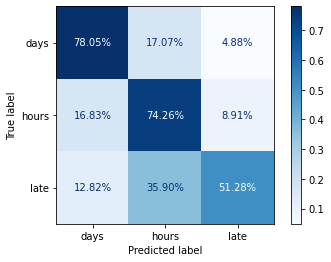

In [45]:
# Decision TREE: Entropy
tree_Entropy = tree.DecisionTreeClassifier(max_depth = opt_depth, criterion = 'entropy', random_state = SEED)
tree_Entropy = tree_Entropy.fit(X_train, y_train)
tree_Entropy_pred = tree_Entropy.predict(X_test)

#metrics
tree_acc = accuracy_score(tree_Entropy_pred, y_test)
tree_preci = precision_score(tree_Entropy_pred, y_test, average = 'weighted')
tree_sensitivity = recall_score(tree_Entropy_pred, y_test, average = 'weighted')
tree_f1 = f1_score(tree_Entropy_pred, y_test, average = 'weighted')

classification_metrics.loc["Tree Entropy"] = [tree_acc, tree_preci, tree_sensitivity, tree_f1]
plot_confusion_matrix(tree_Entropy, X_test, y_test, 
                      display_labels = levels, cmap = plt.cm.Blues,

                      values_format = '0.2%', normalize = 'true')

In [46]:
# Evaluating best parameters
depth = np.arange(4, 20) 
parameters = {'max_depth': depth}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion = 'gini'), parameters, scoring = 'f1_weighted')
clf = clf.fit(X_val, y_val)
opt_depth = clf.best_params_['max_depth']
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'max_depth': 13} with a score of 0.65


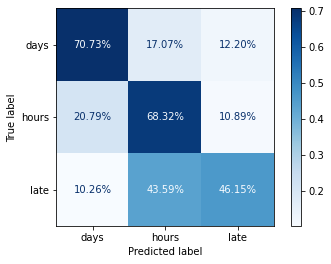

In [47]:
# Decision TREE: Gini
tree_Gini = tree.DecisionTreeClassifier(max_depth = opt_depth, criterion = 'gini', random_state = SEED)
tree_Gini = tree_Gini.fit(X_train, y_train)
tree_Gini_pred = tree_Gini.predict(X_test)

#metrics
tree_acc = accuracy_score(tree_Gini_pred, y_test)
tree_preci = precision_score(tree_Gini_pred, y_test, average = 'weighted')
tree_sensitivity = recall_score(tree_Gini_pred, y_test, average = 'weighted')
tree_f1 = f1_score(tree_Gini_pred, y_test, average = 'weighted')

classification_metrics.loc["Tree Gini"] = [tree_acc, tree_preci, tree_sensitivity, tree_f1]
plot_confusion_matrix(tree_Gini, X_test, y_test, display_labels = levels, cmap = plt.cm.Blues, 
                      values_format = '0.2%',  normalize = 'true')

#### <a class="anchor" id="fifth_3">Random forest</a> 

As the name may suggest, the Random Forest classifier is obtained by parallelly using several decision tree at the same time.

The general idea is to fit a (reasonably) large number of decision tree to different subsample and then let the majority to decide the label. Random forests are a solution that minimizes the overfitting of the training set compared to decision trees.

As for the Decision tree, we will use either the Gini and the Entropy criterion.

In [48]:
# Evaluating best parameters
depth = np.arange(4, 20) 
parameters = {'max_depth': depth}
clf = GridSearchCV(RandomForestClassifier(criterion = 'entropy', n_estimators = 100,
                                          ), parameters, scoring = 'f1_weighted')
clf = clf.fit(X_val, y_val)
opt_depth = clf.best_params_['max_depth']
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'max_depth': 19} with a score of 0.68


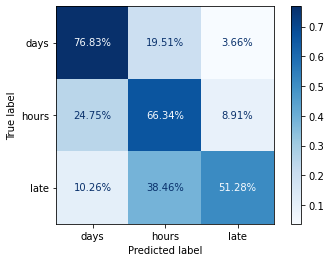

In [49]:
# Random forest - Entropy criterion
forest_Entropy = RandomForestClassifier(max_depth = opt_depth, criterion = 'entropy', n_estimators = 100, random_state = SEED)
forest_Entropy = forest_Entropy.fit(X_train, y_train)
forest_Entropy_pred = forest_Entropy.predict(X_test)

#metrics
forest_acc = accuracy_score(forest_Entropy_pred, y_test)
forest_preci = precision_score(forest_Entropy_pred, y_test, average = 'weighted')
forest_sensitivity = recall_score(forest_Entropy_pred, y_test, average = 'weighted')
forest_f1 = f1_score(forest_Entropy_pred, y_test, average = 'weighted')

classification_metrics.loc["Forest Entropy"] = [forest_acc,forest_preci,forest_sensitivity,forest_f1]
plot_confusion_matrix(forest_Entropy, X_test, y_test, display_labels = levels,
                      cmap = plt.cm.Blues, values_format = '0.2%', normalize = 'true')

In [50]:
# Evaluating best parameters
depth = np.arange(4, 20) 
parameters = {'max_depth': depth}
clf = GridSearchCV(RandomForestClassifier(criterion = 'gini', n_estimators = 100,
                                          ), parameters, scoring = 'f1_weighted')
clf = clf.fit(X_val, y_val)
opt_depth = clf.best_params_['max_depth']
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'max_depth': 11} with a score of 0.67


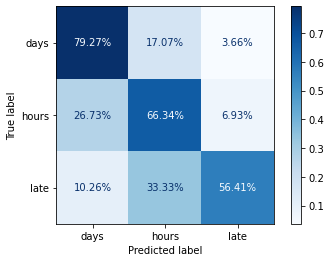

In [51]:
# Random forest - Gini criterion
forest_Gini = RandomForestClassifier(max_depth = opt_depth, criterion = 'gini', n_estimators = 100, random_state = SEED)
forest_Gini = forest_Gini.fit(X_train, y_train)
forest_Gini_pred = forest_Gini.predict(X_test)

#metrics
forest_acc = accuracy_score(forest_Gini_pred, y_test)
forest_preci = precision_score(forest_Gini_pred, y_test, average = 'weighted')
forest_sensitivity = recall_score(forest_Gini_pred, y_test, average = 'weighted')
forest_f1 = f1_score(forest_Gini_pred, y_test, average = 'weighted')

classification_metrics.loc["Forest Gini"] = [forest_acc,forest_preci,forest_sensitivity,forest_f1]
plot_confusion_matrix(forest_Gini, X_test, y_test, display_labels = levels,
                      cmap = plt.cm.Blues, values_format = '0.2%', normalize = 'true')

#### <a class="anchor" id="fifth_4">K Nearest neighbours</a> 

The K-nearest neighbors (KNN) is an algorithm used in the recognition of patterns for classifying objects based on the characteristics of the objects close to the one considered. It is one the simplest algorithms among those used in machine learning. A new point is categorized based on the similiraties of the $K$ data points that are the closest to it. The choice of the parameter $K$ depends on the characteristics of the data. Generally, as $K$ increases, the noise that compromises the classification is reduced, but the criterion of choice for the class becomes more rough. The choice can be made through heuristic techniques.

In [52]:
# Evaluating best parameters
neigh = np.arange(2, 20)
parameters = {'n_neighbors': neigh}
clf = GridSearchCV(KNeighborsClassifier(), parameters, scoring = 'f1_weighted')
clf = clf.fit(X_val, y_val)
opt_neigh = clf.best_params_['n_neighbors']
print("The best parameters are %s with a score of %0.2f" % (clf.best_params_, clf.best_score_))

The best parameters are {'n_neighbors': 3} with a score of 0.51


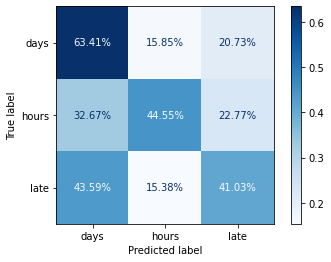

In [53]:
# KNN
knn = KNeighborsClassifier(opt_neigh)
knn = knn.fit(X_train, y_train)
neigh_predict = knn.predict(X_test)

#metrics:
neigh_acc = accuracy_score(neigh_predict, y_test)
neigh_preci = precision_score(neigh_predict, y_test, average = 'weighted')
neigh_sensitivity = recall_score(neigh_predict, y_test, average = 'weighted')
neigh_f1 = f1_score(neigh_predict, y_test, average = 'weighted')

classification_metrics.loc["KNN"] = [neigh_acc,neigh_preci,neigh_sensitivity,neigh_f1]
plot_confusion_matrix(knn, X_test, y_test, display_labels = levels,
                      cmap = plt.cm.Blues, values_format = '0.2%', normalize = 'true')

#### <a class="anchor" id="fifth_5">Support vector machine</a> 

The basic Support-Vector Machine (SVM) model is linear: it finds the optimal hyperplane between the points of two classes such that the distance of the nearest points to the decision boundary is maximized.

Clearly, it is not common to have a linear separation and SVM can be generalized.

This generalization can be made by choosing a non-linear Kernel function to apply to the support vector machine.

Linear support vector machine generally uses as linear kernel:$$ k({\vec{x_i}},{\vec{x_{j}}})={\vec{x_{i}}}\cdot{\vec{x_{j}}}$$

Probably the common non-lineare alternative is the Radial basis kernel:$${k({\vec{x_i},\vec{x_{j}}})=\exp(-\gamma \|{\vec {x_{i}}}-{\vec {x_{j}}}\|^{2})}$$where ${\displaystyle \gamma >0}$ is a parameter to chose. This is in fact the default kernel function in the library.

Basically, the kernel maps the data into another space in which the class can be linearly separated, while in the original space, the boundary will in general be non linear.

In [54]:
# Evaluating best parameters
Cs = np.logspace(-1, 1, 10)
parameters = {'C': Cs}
clf = GridSearchCV(svm.SVC(kernel = "rbf", gamma = 'auto', random_state = SEED), 
                       parameters, scoring = 'f1_weighted')
clf = clf.fit(X_val, y_val)
opt_C = clf.best_params_['C']
print("The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

The best parameters are {'C': 2.1544346900318834} with a score of 0.55


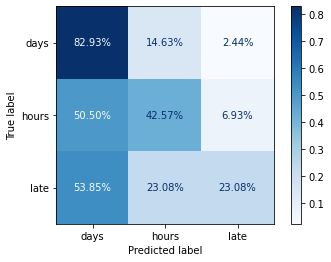

In [55]:
# SVM
svm_mod = svm.SVC(C = opt_C, kernel = "rbf", gamma = 'auto', random_state = SEED)
svm_mod = svm_mod.fit(X_train, y_train)
svm_mod_predict = svm_mod.predict(X_test)

#metrics:
svm_acc = accuracy_score(svm_mod_predict, y_test)
svm_preci = precision_score(svm_mod_predict, y_test, average = 'weighted')
svm_sensitivity = recall_score(svm_mod_predict, y_test, average = 'weighted')
svm_f1 = f1_score(svm_mod_predict, y_test, average = 'weighted')

classification_metrics.loc["SVM"] = [svm_acc,svm_preci,svm_sensitivity,svm_f1]
plot_confusion_matrix(svm_mod, X_test, y_test, display_labels = levels, cmap = plt.cm.Blues,
                      values_format = '0.2%', normalize = 'true')

#### <a class="anchor" id="fifth_6">Model Comparison</a> 

In [56]:
classification_metrics.sort_values('F1 Score')

,Accuracy,Precision,Sensitivity,F1 Score
KNN,0.509009,0.523298,0.509009,0.501912
SVM,0.540541,0.664410,0.540541,0.562196
Logistic regression,0.576577,0.580240,0.576577,0.576086
Tree Gini,0.653153,0.653262,0.653153,0.653190
Forest Entropy,0.675676,0.685149,0.675676,0.678553
Forest Gini,0.693694,0.704979,0.693694,0.696118
Tree Entropy,0.716216,0.723109,0.716216,0.718885


Overall, considering the three classes and the unbalanced sets, we can conclude that the initial work on preprocessing, labeling and oversampling of data has paid off.

Using SMOTE-based data, classification algorithms work pretty well.
Trees and forests perform definitely better than the other classifiers.
KNN behave significantly worse than the others.
We also see that there is no more favorable criterion for the division of trees, Gini and Entropy perform quite similarly.


### 5.2 <a class="anchor" id="fifth_2">Binary classification</a>

Now we use a two-classes target, splitted by using the median value.

In [57]:
binary_metrics = pd.DataFrame(columns=["Accuracy", "Precision", "Sensitivity", "F1 Score"])

# Logistic regression
logistic = LogisticRegression(max_iter = 10000, random_state = SEED, solver = 'lbfgs')
logistic.fit(Xbin_train, ybin_train)
logistic_predict = logistic.predict(Xbin_test)
logi_acc = accuracy_score(logistic_predict, ybin_test)
logi_preci = precision_score(logistic_predict, ybin_test)
logi_sensitivity = recall_score(logistic_predict, ybin_test)
logi_f1 = f1_score(logistic_predict, ybin_test)
binary_metrics.loc["Logistic regression"] = [logi_acc,logi_preci,logi_sensitivity,logi_f1]

depth = np.arange(4, 20) # for trees and forests
parameters = {'max_depth': depth}
# Decision Tree
## Entropy criterion
tree_Entropy = GridSearchCV(tree.DecisionTreeClassifier(criterion = 'entropy', random_state = SEED), parameters, scoring = 'f1')
tree_Entropy = tree_Entropy.fit(Xbin_train, ybin_train)
tree_Entropy_pred = tree_Entropy.predict(Xbin_test)
tree_acc = accuracy_score(tree_Entropy_pred, ybin_test)
tree_preci = precision_score(tree_Entropy_pred, ybin_test)
tree_sensitivity = recall_score(tree_Entropy_pred, ybin_test)
tree_f1 = f1_score(tree_Entropy_pred, ybin_test)
binary_metrics.loc["Tree Entropy"] = [tree_acc, tree_preci, tree_sensitivity, tree_f1]
## Gini criterion
tree_Gini = GridSearchCV(tree.DecisionTreeClassifier(criterion = 'gini', random_state = SEED), parameters, scoring = 'f1')
tree_Gini = tree_Gini.fit(Xbin_train, ybin_train)
tree_Gini_pred = tree_Gini.predict(Xbin_test)
tree_acc = accuracy_score(tree_Gini_pred, ybin_test)
tree_preci = precision_score(tree_Gini_pred, ybin_test)
tree_sensitivity = recall_score(tree_Gini_pred, ybin_test)
tree_f1 = f1_score(tree_Gini_pred, ybin_test)
binary_metrics.loc["Tree Gini"] = [tree_acc, tree_preci, tree_sensitivity, tree_f1]

# Random forest
parameters = {'max_depth': depth}
## Entropy criterion
forest_Entropy = GridSearchCV(RandomForestClassifier(n_estimators = 100, criterion = 'entropy', 
                                                     random_state = SEED), parameters, scoring = 'f1')
forest_Entropy = forest_Entropy.fit(Xbin_train, ybin_train)
forest_Entropy_pred = forest_Entropy.predict(Xbin_test)
forest_acc = accuracy_score(forest_Entropy_pred, ybin_test)
forest_preci = precision_score(forest_Entropy_pred, ybin_test)
forest_sensitivity = recall_score(forest_Entropy_pred, ybin_test)
forest_f1 = f1_score(forest_Entropy_pred, ybin_test)
binary_metrics.loc["Forest Entropy"] = [forest_acc,forest_preci,forest_sensitivity,forest_f1]
## Gini criterion
forest_Gini = GridSearchCV(RandomForestClassifier(n_estimators = 100, criterion = 'gini', 
                                                  random_state = SEED), parameters, scoring = 'f1')
forest_Gini = forest_Gini.fit(Xbin_train, ybin_train)
forest_Gini_pred = forest_Gini.predict(Xbin_test)
forest_acc = accuracy_score(forest_Gini_pred, ybin_test)
forest_preci = precision_score(forest_Gini_pred, ybin_test)
forest_sensitivity = recall_score(forest_Gini_pred, ybin_test)
forest_f1 = f1_score(forest_Gini_pred, ybin_test)
binary_metrics.loc["Forest Gini"] = [forest_acc,forest_preci,forest_sensitivity,forest_f1]

# KNN
neigh = np.arange(2, 20)
parameters = {'n_neighbors': neigh}
knn = GridSearchCV(KNeighborsClassifier(), parameters, scoring = 'f1')
knn = knn.fit(Xbin_train, ybin_train)
knn_predict = knn.predict(Xbin_test)
neigh_acc = accuracy_score(knn_predict, ybin_test)
neigh_preci = precision_score(knn_predict, ybin_test)
neigh_sensitivity = recall_score(knn_predict, ybin_test)
neigh_f1 = f1_score(knn_predict, ybin_test)
binary_metrics.loc["KNN"] = [neigh_acc,neigh_preci,neigh_sensitivity,neigh_f1]

# SVM
Cs = np.logspace(-2, 2, 8)
parameters = {'C': Cs}
svm_mod = GridSearchCV(svm.SVC(gamma = 'auto', kernel = "rbf", random_state = SEED), parameters, scoring = 'f1')
svm_mod = svm_mod.fit(Xbin_train, ybin_train)
svm_mod_predict = svm_mod.predict(Xbin_test)
svm_acc = accuracy_score(svm_mod_predict, ybin_test)
svm_preci = precision_score(svm_mod_predict, ybin_test)
svm_sensitivity = recall_score(svm_mod_predict, ybin_test)
svm_f1 = f1_score(svm_mod_predict, ybin_test)
binary_metrics.loc["SVM"] = [svm_acc,svm_preci,svm_sensitivity,svm_f1]

# MODEL COMPARISON
binary_metrics.sort_values('F1 Score')

,Accuracy,Precision,Sensitivity,F1 Score
Tree Gini,0.671171,0.654412,0.773913,0.709163
Tree Entropy,0.693694,0.735294,0.757576,0.746269
KNN,0.666667,0.816176,0.693750,0.750000
SVM,0.662162,0.852941,0.678363,0.755700
Logistic regression,0.657658,0.867647,0.670455,0.756410
Forest Gini,0.761261,0.852941,0.778523,0.814035
Forest Entropy,0.761261,0.867647,0.771242,0.816609


By using this configuration settings, all models perform well.
We see that with this choice of parameters we have a high level of precision, while the accuracy remains somewhat lower. It is often appropiate to use *F1 Score* as a comparing measure, as it is a composed metrics that consider all of the other metrics. 

In general, we can manage a trade off between accuracy and precision: we could choose the classifier parameters in order to privilege one of that, depending on whether we prefer to have false positives or false negatives. For example, a company may wish to take into account the risk of someone being absent even if this is very low. All of this can be easily performed by considering it in the validation step.

### 5.3 <a class="anchor" id="fifth_3"> Feature importance</a> 
Random Forest with Gini criterion is one the best classification model.
We use it for extracting information on the features: let's rank their importance.

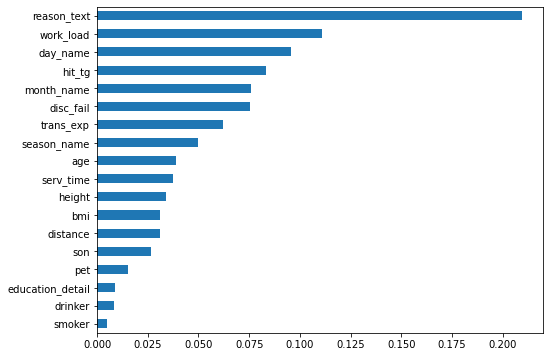

In [58]:
# Feature importance
forest_Entropy = RandomForestClassifier(criterion = 'gini', max_depth = 18,
                                        n_estimators = 100, random_state = SEED)
forest_Entropy = forest_Entropy.fit(X, ylabel)
ax = (pd.Series(forest_Entropy.feature_importances_, index = X.columns)
   .nsmallest(20)
   .plot(kind='barh', figsize=(8,6)))
plt.show()

#### Reason of absence

The most importance feature is *Reason of absence*. Let's analyze which reasons are most related to each level of absence.

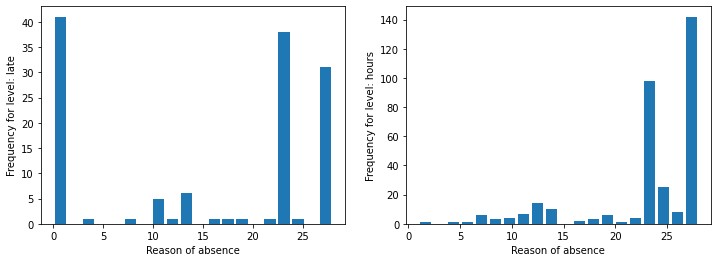

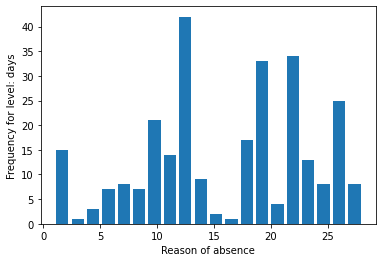

In [59]:
# Distribution of reasons for each level of absence
fig, (late, hours) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))
fig, days = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 4))
for lev in levels:
  reason_lev = ds_explore[ds['abs_lev'] == lev].loc[:,'reason']
  if(lev == 'late'):
    ax = late
  if(lev == 'hours'):
    ax = hours
  if(lev == 'days'):
    ax = days
  ax.hist(reason_lev, bins, rwidth = 0.8)
  ax.set_xlabel('Reason of absence')
  ax.set_ylabel('Frequency for level: ' + lev)

Recalling the coding on the reasons for absence reported at the beginning, we note for example that practically all absences whit *reason* = 0 (i.e. Not available) refer to late. We had already noticed this in the Data Preprocessing section. 

We also notice that the *Reason of absence codes* for *hours* are mainly distributed from 22 to 28, corresponding to no International Code of Diseases (ICD), i.e. not illnesses or insults, but check-ups, medical consultations and others.

On the contrary, for absences of a day or more, the reason is often a serious medical problem.

Let's see, for each *Reason*, how records are distribuited among the levels of absence.

In [60]:
reason_abs_lev = ds.groupby('reason_text')['abs_lev'].value_counts().unstack().fillna(0).astype(int)
reason_abs_lev

abs_lev,days,hours,late
reason_text,,,
Blood donation,3,0,0
Certain conditions originating in the perinatal period,0,2,1
Certain infectious and parasitic diseases,14,1,1
"Congenital malformations, deformations and chromosomal abnormalities",1,0,0
Dental consultation,8,76,28
Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism,1,0,0
Diseases of the circulatory system,4,0,0
Diseases of the digestive system,14,7,5
Diseases of the ear and mastoid process,3,3,0


In [61]:
# Main absence for abs_lev = late
reason_abs_lev.sort_values(by = ['late'], ascending = False).head()

abs_lev,days,hours,late
reason_text,,,
Not available,0,0,40
Medical consultation,13,98,38
Dental consultation,8,76,28
Diseases of the musculoskeletal system and connective tissue,38,11,6
Diseases of the digestive system,14,7,5


In [62]:
# Main absence for abs_lev = hours
reason_abs_lev.sort_values(by = ['hours'], ascending = False).head()

abs_lev,days,hours,late
reason_text,,,
Medical consultation,13,98,38
Dental consultation,8,76,28
Physiotherapy,0,66,3
Laboratory examination,5,25,1
Diseases of the musculoskeletal system and connective tissue,38,11,6


In [63]:
# Main absence for abs_lev = days
reason_abs_lev.sort_values(by = ['days'], ascending = False).head()

abs_lev,days,hours,late
reason_text,,,
Diseases of the musculoskeletal system and connective tissue,38,11,6
Patient follow-up,34,4,0
"Injury, poisoning and certain other consequences of external causes",33,6,1
Unjustified absence,25,8,0
Diseases of the respiratory system,21,4,0


#### Day of the week
The day of the week is the second most importance feature.

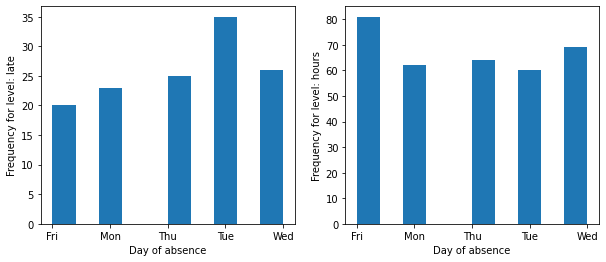

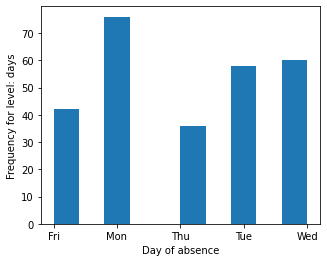

In [64]:
# Distribution of days for level of absence

fig, (late, hours) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
fig, days = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 4))
for lev in levels:
  days_lev = ds_explore[ds['abs_lev'] == lev].loc[:,'day_name']
  if(lev == 'late'):
    ax = late
  if(lev == 'hours'):
    ax = hours
  if(lev == 'days'):
    ax = days
  ax.hist(sorted(days_lev), rwidth = 1)
  ax.set_xlabel('Day of absence')
  ax.set_ylabel('Frequency for level: ' + lev)

In [65]:
days_abs_lev = ds.groupby('day_name')['abs_lev'].value_counts().unstack().fillna(0).astype(int)
days_abs_lev

abs_lev,days,hours,late
day_name,,,
Fri,42,81,20
Mon,76,62,23
Thu,36,64,25
Tue,58,60,35
Wed,60,69,26


#### Work load


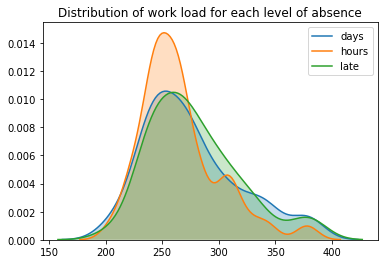

In [66]:
# Distribution of work load for each level of absence
for lev in levels:
  wload_lev = ds_explore[ds['abs_lev'] == lev].loc[:,'work_load']
  sns.kdeplot(wload_lev, label = lev, shade = True,
              ).set_title('Distribution of work load for each level of absence')

## 6. <a anchor='sixth'>References</a>


* Martiniano, A., Ferreira, R. P., Sassi, R. J., & Affonso, C. (2012). Application of a neuro fuzzy network in prediction of absenteeism at work. In Information Systems and Technologies (CISTI), 7th Iberian Conference on (pp. 1-4). IEEE.
* An Introduction to Statistical Learning with application in R, Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani
* [Performance Metrics for Classification problems in Machine Learning
](https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)
* [Credit Fraud || Dealing with Imbalanced Datasets
](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)
* [SMOTE and ADASYN (Handling Imbalanced Data Set)
](https://medium.com/coinmonks/smote-and-adasyn-handling-imbalanced-data-set-34f5223e167)
* [Oversampling - imbalanced-learn documentation](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html)


